In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


pd.options.display.width = 10000
pd.options.display.max_columns = None

## Задание 1.3

Рассмотрим две независимые выборки $X_1$ и $X_2$ из нормального распределения $N(\mu_1, \sigma_1^2)$, $N(\mu_2, \sigma_2^2)$ объемов $n_1$ и $n_2$ соответственно. 

Рассмотрим распределение Фишера: 

$$Y_1 \sim \chi^2(n_1 - 1)$$
$$Y_2 \sim \chi^2(n_2 - 1)$$

с независимыми $Y_1$ и $Y_2$, тогда

$$ \frac{Y_1/(n_1)}{Y_2/(n_2)} \sim F(n_1, n_2) $$

так как $X_1$ и $X_2$ -- независимые выборки из нормального распределения, то, по теореме Фишера: 

$$\sqrt{n} \frac{\overline{X} - \mu}{\sigma} \sim N(0, 1)$$
$$\frac{n_i \cdot S_*^2(X_i)}{\sigma_i^2} \sim \chi^2 (n_i-1)$$
Случайные величины $\bar{X_i}$ и $S_i^2$ независимы



Рассмотрим функцию: 

$$ \frac{n_2S_*^2(X_2)(n_1-1)}{n_1S_*^2(X_1)(n_2-1)} \cdot \frac{\sigma_1^2}{\sigma_2^2} \sim F(n_2, n_1) $$

Получаем доверительный интервал: 

$$P \left(q_{\alpha/2} \leq \frac{n_2S_*^2(X_2)(n_1-1)}{n_1S_*^2(X_1)(n_2-1)} \cdot \tau \leq q_{1-\alpha/2}\right) = 1 - \alpha$$

$$P \left(\frac{n_1S_*^2(X_1)(n_2-1)}{n_2S_*^2(X_2)(n_1-1)} q_{\alpha/2} \leq  \tau \leq \frac{n_1S_*^2(X_1)(n_2-1)}{n_2S_*^2(X_2)(n_1-1)} q_{1-\alpha/2}\right) = 1 - \alpha$$

Получаем доверительный интервал: 

$$\left[\frac{n_1S_*^2(X_1)(n_2-1)}{n_2S_*^2(X_2)(n_1-1)} q_{\alpha/2};~~\frac{n_1S_*^2(X_1)(n_2-1)}{n_2S_*^2(X_2)(n_1-1)} q_{1-\alpha/2} \right] $$

Сгенерируем две выборки $X_1$ и $X_2$ с параметрами $\mu_1 = 0$, $\mu_2 = 0$, $\sigma_1^2 = 2$, $\sigma_2^2 = 1$, найдем для них доверительный интервал для отношения дисперсий. 

Success rate:  0.95
Success rate:  0.96


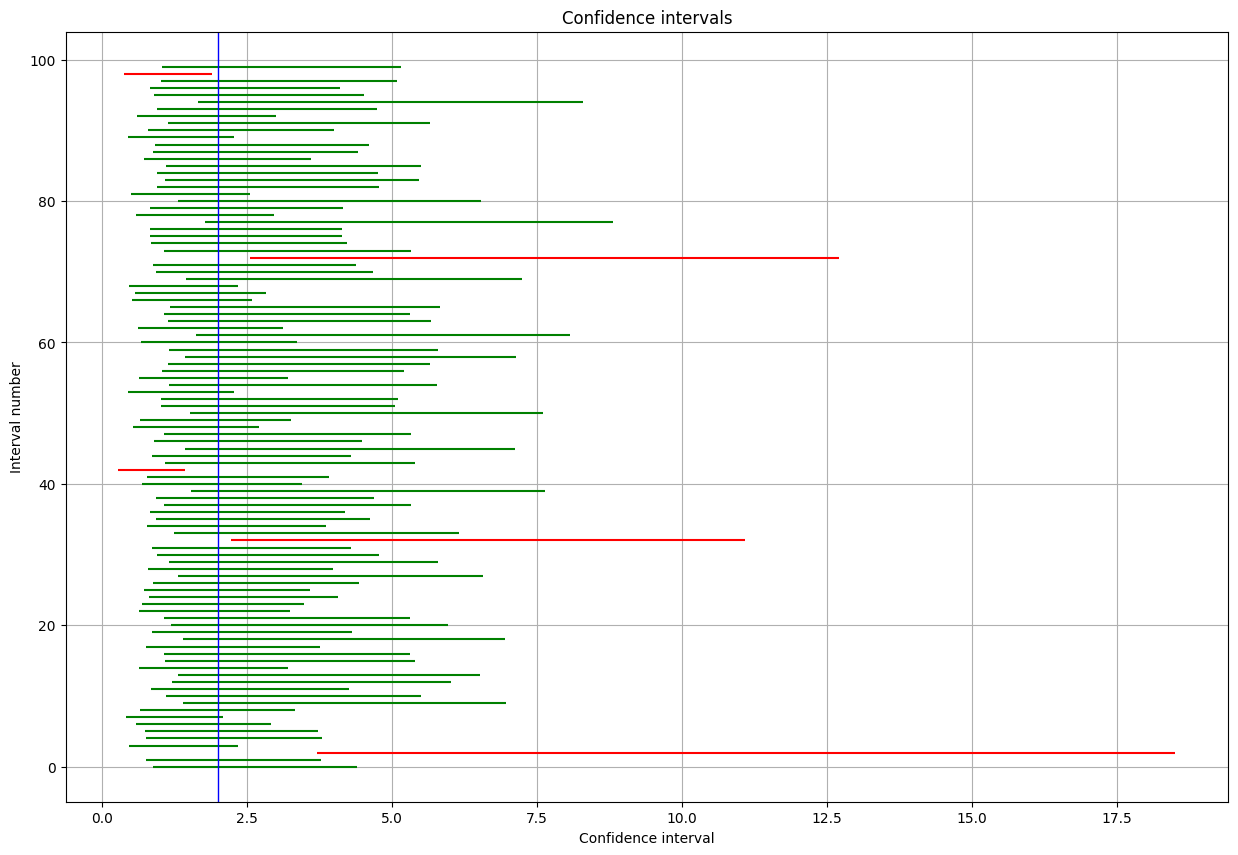

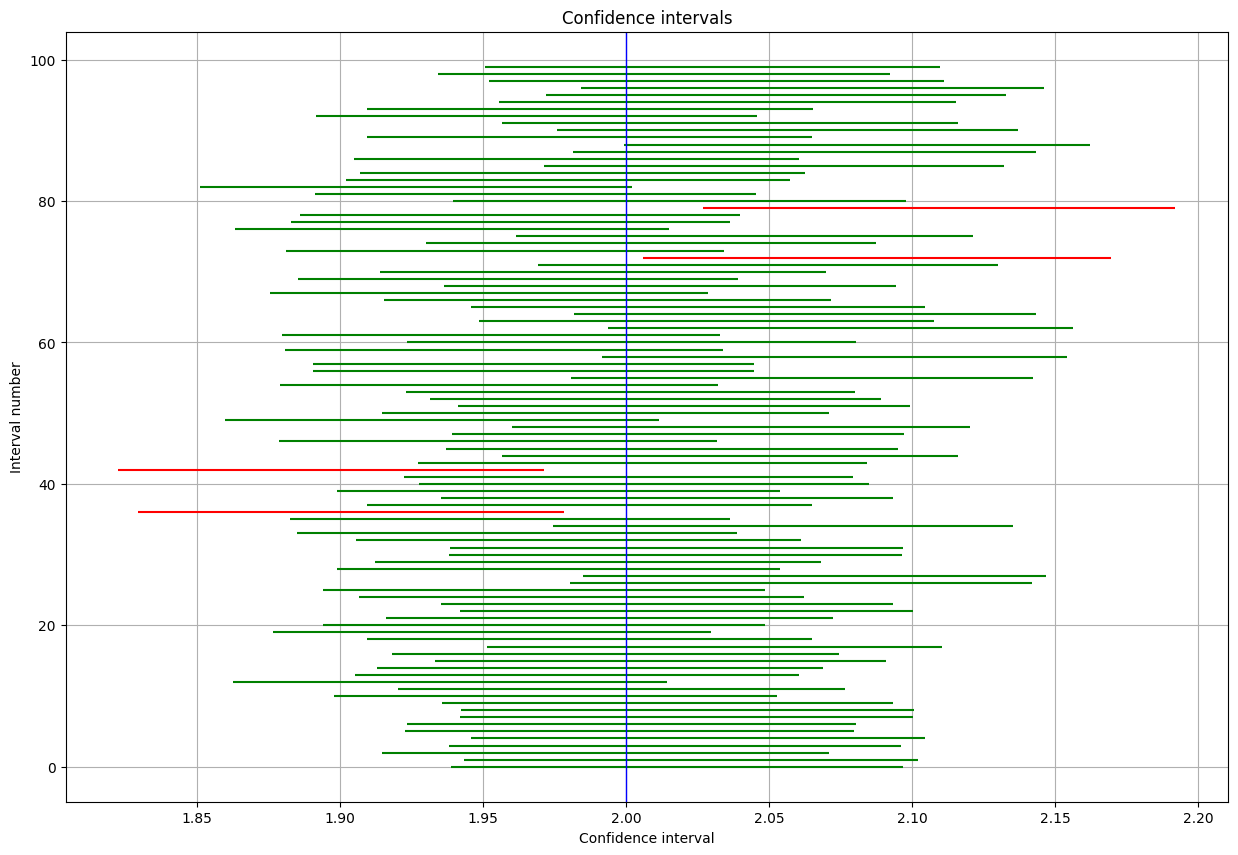

In [43]:
mu1 = 0
mu2 = 0
sigma1 = 2
sigma2 = 1

alpha = 0.95

def interval(X1, X2, alpha):
    left = stats.f.ppf(alpha / 2, len(X2), len(X1)) * (len(X1) * np.var(X1) * (len(X2) - 1)) / (len(X2) * np.var(X2) * (len(X1) - 1))
    right = stats.f.ppf(1-alpha/2, len(X2), len(X1)) * (len(X1) * np.var(X1) * (len(X2) - 1)) / (len(X2) * np.var(X2) * (len(X1) - 1))

    return left, right


def plot_histogram(starts, ends, true_val):
    plt.figure(figsize=(15, 10))
    plt.title('Confidence intervals')
    plt.xlabel('Confidence interval')
    plt.ylabel('Interval number')
    plt.grid()
    colors = ['red' if (true_val < starts[i] or true_val > ends[i]) else 'green' for i in range(len(starts))]
    plt.hlines(range(len(starts)), starts, ends, colors=colors)
    plt.axvline(x=true_val, color='blue', lw=1)


def check_intervals(N, samples_size):
    intervals_starts = []
    intervals_ends = []

    for i in range(N):
        X1 = np.random.normal(mu1, np.sqrt(sigma1), samples_size)
        X2 = np.random.normal(mu2, np.sqrt(sigma2), samples_size)
        left, right = interval(X1, X2, 1 - alpha)   
        intervals_starts.append(left)
        intervals_ends.append(right)

    plot_histogram(intervals_starts, intervals_ends, sigma1/sigma2)
    print("Success rate: ", len([1 for i in range(N) if intervals_starts[i] <= sigma1/sigma2 <= intervals_ends[i]]) / N)

check_intervals(N=100, samples_size=25)
check_intervals(N=100, samples_size=10000)

## Вывод
Результат изменился в лучшую сторону. При выборке в 10000 значений, 95-процентный интервал покрывает реальное значение параметра в большем числе случаев, чем при выборке в 25 значений, однако не всегда. 

Объяснить это можно тем, что при росте выборки доверительный интервал уменьшается, а доверительная вероятность остается такой же.

При росте объемов выборок уменьшается доверительный интервал, а следовательно растет точность оценки. Это положительно сказывается на результатах вычислений.

## Задание 2.2

Рассмотрим распределение Лапласса с единичным параметром масштаба $\beta = 1$ и неизвестным параметром сдвига $\mu$

Найдем выборочную математическое ожидание $E$ для выборки $X$, которая, в силу того, что параметр сдвигу $\mu$ распределения Лапласса является медианой и мат.ожиданием, будет оценкой параметра $\mu$. 

Найдем мат. ожидание и дисперсию данного распределения: 

$$E(X) =  \mu\quad D(X) = \frac{2}{\beta^2} = 2$$ 

Центральная предельная теорема утверждает, что для достаточно большого числа выборок любой совокупности случайных величин, распределенных по одному и тому же закону, независимо от формы этого закона, распределение средних значений этих случайных величин приближается к нормальному распределению.

То есть: 

$$Z = \sqrt{n}\frac{\overline{X} - \mu}{\sqrt{D}} \sim N(0, 1) $$

Обозначим $Z_a$ -- квантиль уровня $a$ стандартного нормального распределения. 

Тогда доверительный интервал можно записать в виде:
$$P(-Z_{1 - \alpha/2} \le Z \le Z_{1 - \alpha/2}) = 1 - \alpha$$
Или, подставив значение $Z$:
$$P(-Z_{1 - \alpha/2} \le \sqrt{n}\frac{\overline{X} - \mu}{\sqrt{D}} \le Z_{1 - \alpha/2}) \rightarrow 1 - \alpha$$
$$P(-Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} \le \overline{X} - \mu \le Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}}) \rightarrow 1 - \alpha$$
$$P(-Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} - \overline{X} \le - \mu \le Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} - \overline{X}) \rightarrow 1 - \alpha$$
$$P(\overline{X} - Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} \le \mu \le \overline{X} + Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}}) \rightarrow 1 - \alpha$$

Полученный доверительный интервал для параметра $\mu$:
$$\left[\overline{X} - Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}};~~ \overline{X} + Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} \right]$$

### Проведем эксперимент: 

Сгенерируем 1000 выборок из распределения Лапласса с параметрами $\mu = 2$ и $\beta = 1$ размером $n = 25$ и найдем выборочную медиану для каждой. Проверим, сколько значений параметра $\mu$ попадает в доверительный интервал уровня доверия $0.95$. 

Success rate:  0.9
Success rate:  0.97


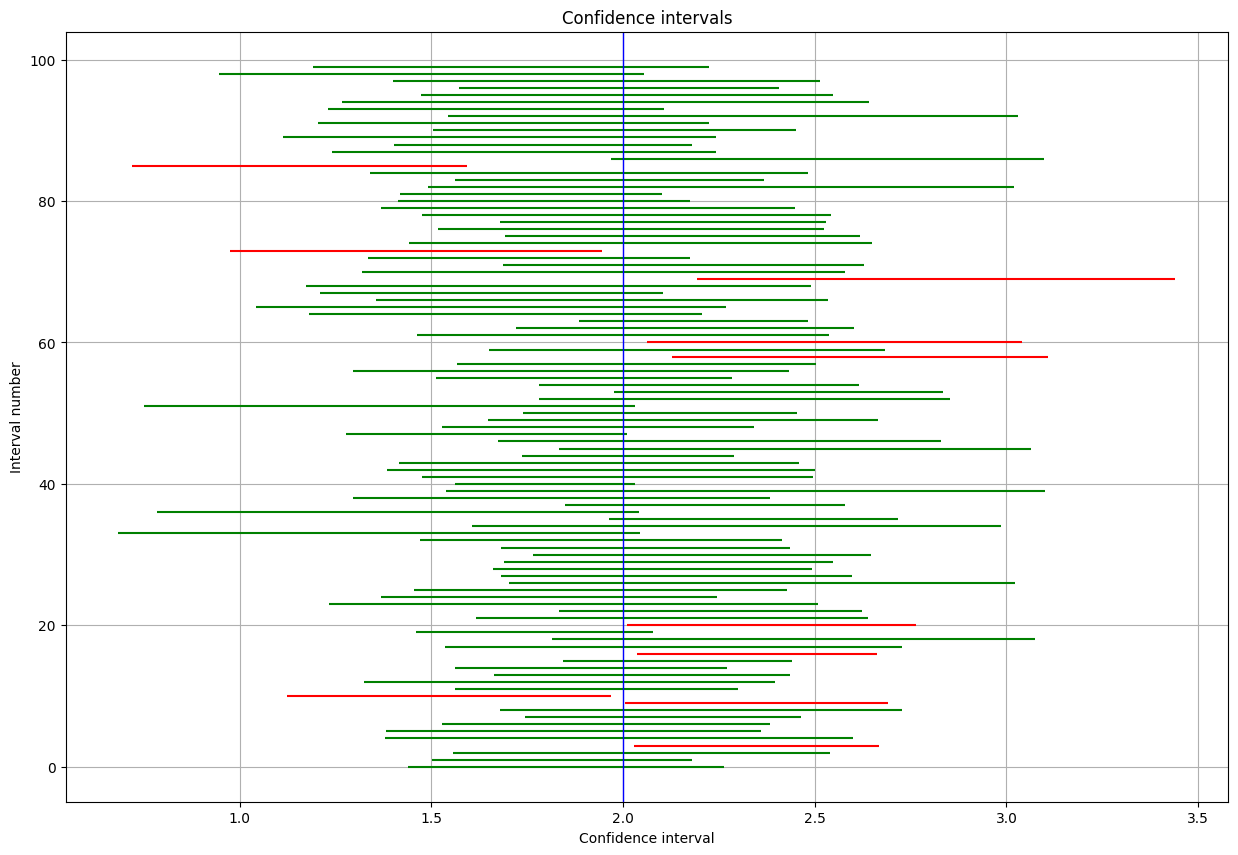

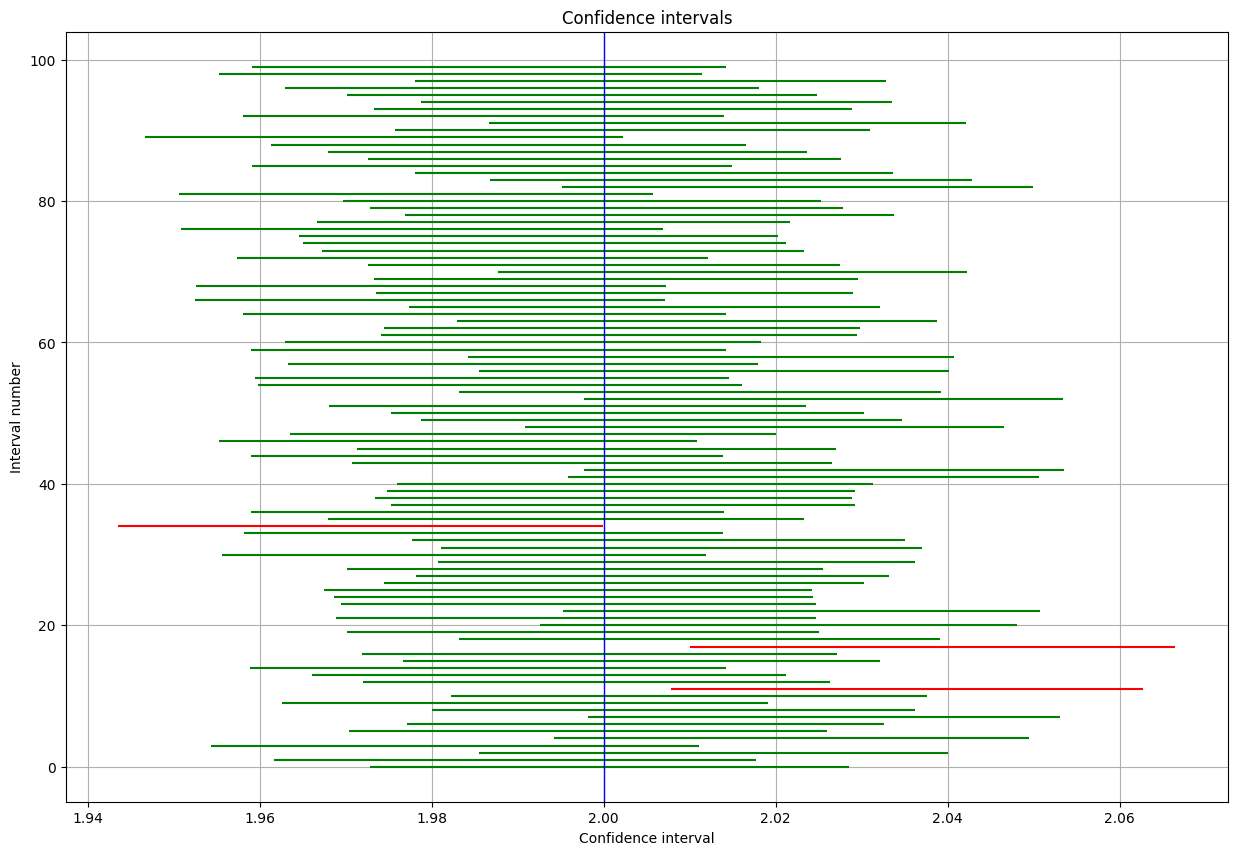

In [36]:
mu = 2
alpha = 0.95

def interval(X, alpha):
    mean = np.mean(X)
    D = np.var(X)
    Z = stats.norm.ppf(1-alpha/2)
    N = len(X)
    
    left = mean - Z * np.sqrt(D/N)
    right = mean + Z * np.sqrt(D/N)

    return left, right


def laplace(n):
    beta = 1
    return np.random.laplace(mu, beta, n)


def plot_histogram(starts, ends, true_val):
    plt.figure(figsize=(15, 10))
    plt.title('Confidence intervals')
    plt.xlabel('Confidence interval')
    plt.ylabel('Interval number')
    plt.grid()
    colors = ['red' if (true_val < starts[i] or true_val > ends[i]) else 'green' for i in range(len(starts))]
    plt.hlines(range(len(starts)), starts, ends, colors=colors)
    plt.axvline(x=true_val, color='blue', lw=1)


def check_intervals(N, samples_size):
    intervals_starts = []
    intervals_ends = []

    for i in range(N):
        samples = laplace(samples_size)
        left, right = interval(samples, 1 - alpha)   
        intervals_starts.append(left)
        intervals_ends.append(right)

    plot_histogram(intervals_starts, intervals_ends, mu)
    print("Success rate: ", len([1 for i in range(N) if intervals_starts[i] <= mu <= intervals_ends[i]]) / N)

check_intervals(N=100, samples_size=25)
check_intervals(N=100, samples_size=10000)